In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import entropy

In [3]:
swag_inclass = np.load('./output_in.npz')
swag_outclass = np.load('./output_out.npz')

In [29]:
swag_inclass['entropies']= np.sort(swag_inclass['entropies'])[:-1]

TypeError: 'NpzFile' object does not support item assignment

In [26]:
swag_inclass['entropies']

array([4.51385539e-06, 9.77640886e-06, 9.04693132e-03, 1.13711318e-02,
       5.88800006e-06, 1.01986218e-02, 2.47711177e-02, 9.01698655e-06,
       1.22915928e-05, 1.01266314e-02, 7.84314121e-06, 1.52016066e-06,
       6.29171970e-06, 1.06890444e-02, 1.16022276e-05, 6.19612263e-06,
       9.12061679e-03, 4.67344374e-06, 7.10328162e-06, 9.37882941e-06,
       6.86038977e-05, 9.03156075e-06, 1.13203497e-02, 1.77393995e-02,
       1.66821862e-02, 1.20266692e-02, 1.63611501e-01, 2.68834654e-06,
       9.39324359e-03, 1.29899674e-02, 5.04502951e-06, 9.93237690e-03,
       4.47203917e-06, 1.10062574e-02, 2.32528254e-02, 1.37937520e-02,
       2.40399476e-05, 1.68199194e-02, 1.35538391e-02, 3.88142114e-05,
       1.57671754e-05, 3.58283092e-06, 9.53685243e-03, 9.02472479e-03,
       2.17549755e-02, 2.54347878e-06, 3.94829759e-02, 5.10763908e-06,
       2.03163480e-02, 8.48612522e-07, 9.68610738e-03, 1.10852142e-02,
       1.47369433e-02, 1.00972562e-02, 3.94895703e-05, 1.35144499e-05,
      

(array([55.,  0., 24., 15.,  6.,  6.,  2.,  1.,  0.,  2.]),
 array([3.79862643e-07, 3.94863946e-03, 7.89689906e-03, 1.18451587e-02,
        1.57934183e-02, 1.97416779e-02, 2.36899375e-02, 2.76381971e-02,
        3.15864567e-02, 3.55347163e-02, 3.94829759e-02]),
 <BarContainer object of 10 artists>)

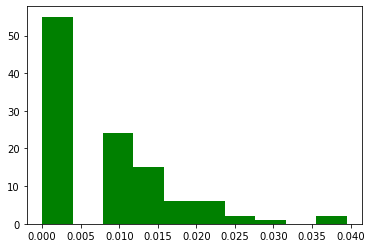

In [31]:
plt.hist(np.sort(swag_inclass['entropies'])[:-1], color='green')

(array([60.,  0.,  0., 12.,  3.,  0.,  0.,  8.,  6.,  2.]),
 array([0.        , 0.00905346, 0.01810693, 0.02716039, 0.03621386,
        0.04526732, 0.05432079, 0.06337425, 0.07242772, 0.08148118,
        0.09053465]),
 <BarContainer object of 10 artists>)

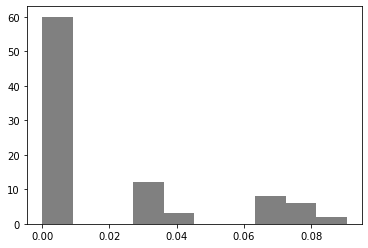

In [32]:
plt.hist(np.sort(swag_outclass['entropies']), color='grey')

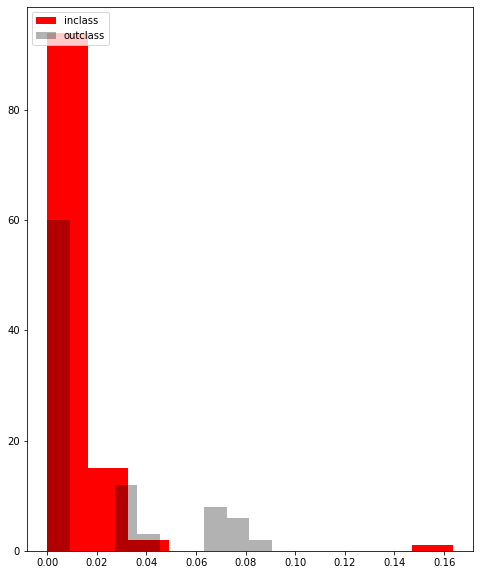

In [38]:
plt.figure(figsize=(8,10))
plt.hist(np.sort(swag_inclass['entropies']),label="inclass", color = "red")
plt.hist(swag_outclass['entropies'], alpha=0.3, label="outclass", color = "black")
plt.legend(loc="upper left")


In [19]:
swag_outclass['entropies'].mean()

0.019224983948732784

In [20]:
swag_inclass['entropies'].mean()

0.008924773988902302

In [40]:
def binned_kl_distance(dist1, dist2, smooth=1e-7, bins = np.logspace(-8, 0.5, num=30)):
    dist1_pdf, _ = np.histogram(dist1, bins)
    dist2_pdf, _ = np.histogram(dist2, bins)
    
    dist1_pdf = dist1_pdf + smooth
    dist2_pdf = dist2_pdf + smooth
    
    dist1_pdf_normalized = dist1_pdf / dist1_pdf.sum()
    dist2_pdf_normalized = dist2_pdf / dist2_pdf.sum()
    
    kldist = entropy(dist1_pdf_normalized, dist2_pdf_normalized) + entropy(dist2_pdf_normalized, dist1_pdf_normalized)
    return kldist

In [41]:
binned_kl_distance(swag_inclass['entropies'], swag_outclass['entropies'])

33.78631041436573

C:\Users\Z0049YKN\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Z0049YKN\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

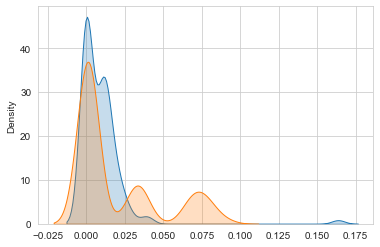

In [48]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(swag_inclass['entropies'],shade=True, bw=0.25)
sns.kdeplot(swag_outclass['entropies'],shade=True, bw=0.25)



In [49]:
swag_inclass['entropies'].shape

(112,)

In [50]:
swag_outclass['entropies'].shape

(91,)